# **Assigment 2**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

## **Load Dataset**

In [4]:
df = pd.read_csv("/content/drive/MyDrive/Bootcamp/StartupCampus/dataset/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


Tentu, berikut adalah detail kolom pada dataset penyakit jantung yang Anda sebutkan:

*  age - usia dalam tahun
*  sex - (1 = pria; 0 = wanita)
*  cp - jenis nyeri dada
    - 0: Angina khas: nyeri dada terkait penurunan pasokan darah ke jantung
    - 1: Angina atipikal: nyeri dada tidak terkait dengan jantung
    - 2: Nyeri non-angina: biasanya spasme esofagus (tidak terkait jantung)
    - 3: Asimptomatik: nyeri dada tidak menunjukkan tanda-tanda penyakit
*  trestbps - tekanan darah istirahat (dalam mm Hg saat masuk rumah sakit): apa pun di atas 130-140 biasanya menjadi penyebab kekhawatiran
*  chol - kolesterol serum dalam mg/dl
    - serum = LDL + HDL + .2 * trigliserida
    - di atas 200 adalah penyebab kekhawatiran
*  fbs - (gula darah puasa > 120 mg/dl) (1 = benar; 0 = salah)
    - ">126" mg/dL menandakan diabetes
*  restecg - hasil elektrokardiografi istirahat
    - 0: Tidak ada catatan
    - 1: Abnormalitas gelombang ST-T dapat berkisar dari gejala ringan hingga masalah parah menandakan detak jantung tidak normal
    - 2: Kemungkinan atau pasti hipertrofi ventrikel kiri
*  thalach - frekuensi jantung maksimum yang dicapai
*  exang - angina yang diinduksi olahraga (1 = ya; 0 = tidak)
*  oldpeak - depresi ST yang diinduksi oleh olahraga relatif terhadap istirahat melihat stres jantung selama olahraga jantung yang tidak sehat akan stres lebih banyak
*  slope - kemiringan segmen ST puncak latihan
    - 0: Meningkat: frekuensi jantung lebih baik dengan olahraga (tidak umum)
    - 1: Datar: perubahan minimal (jantung sehat khas)
    - 2: Menurun: tanda-tanda jantung tidak sehat
*  ca - jumlah pembuluh utama yang diwarnai oleh flourosopy
    - pembuluh berwarna berarti dokter dapat melihat darah melewatinya
    - semakin banyak pergerakan darah semakin baik (tidak ada gumpalan)
*  thal - hasil stres talium
*  target - memiliki penyakit atau tidak (1=ya, 0=tidak) (=atribut yang diprediksi)1

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## **Mencari Missing Value**

In [7]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Tidak ada missing value

## **Mencari Duplicated Value**

In [8]:
df.duplicated().sum()

723

terdapat banyak duplikasi data

In [9]:
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

duplicate_rows_data = df[df.duplicated(keep=False)]
grouped_duplicates = duplicate_rows_data.groupby(list(df.columns))
for key, item in grouped_duplicates:
  print(grouped_duplicates.get_group(key), "\n\n")

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  ca  thal  target
60    29    1   1       130   204    0        0      202      0      0.0      2   0     2       1
64    29    1   1       130   204    0        0      202      0      0.0      2   0     2       1
118   29    1   1       130   204    0        0      202      0      0.0      2   0     2       1
668   29    1   1       130   204    0        0      202      0      0.0      2   0     2       1 


     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  ca  thal  target
12    34    0   1       118   210    0        1      192      0      0.7      2   0     2       1
15    34    0   1       118   210    0        1      192      0      0.7      2   0     2       1
779   34    0   1       118   210    0        1      192      0      0.7      2   0     2       1 


     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  ca  thal  target
143   34    1 

### Menghapus Duplicated

In [10]:
# Sebelum menghapus duplikasi data
df.shape

(1025, 14)

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
# Setelah menghapus duplikasi data
df.shape

(302, 14)

## **Memeriksa Outlier**

In [13]:
nunique_values = df.nunique()
nunique_values

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [14]:
columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

fig = make_subplots(rows=1, cols=len(columns))
for i, column in enumerate(columns):
  fig.add_trace(go.Box(y=df[column], name=column), row=1, col=i+1)

fig.show()

In [15]:
fig = make_subplots(rows=1, cols=len(columns))
for i, column in enumerate(columns):
  fig.add_trace(go.Violin(y=df[column], name=column, box_visible=True, meanline_visible=True), row=1, col=i+1)

fig.show()

Terdapat Outlier

### Menangani Outlier

In [16]:
# Sebelum menangani outlier
df.shape

(302, 14)

**Menangani Outlier dengan menganti nilai nilai outlier dengan batas yang diperbolehkan**

In [17]:
for column in columns:
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
  df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

In [18]:
# Setelah menangani outlier
df.shape

(302, 14)

tidak ada data yang di hapus

In [19]:
fig = make_subplots(rows=1, cols=len(columns))
for i, column in enumerate(columns):
  fig.add_trace(go.Box(y=df[column], name=column), row=1, col=i+1)

fig.show()

## **Memeriksa Imbalance Data**

In [20]:
df['target'].value_counts()

target
1    164
0    138
Name: count, dtype: int64

In [21]:
class_counts = df['target'].value_counts()

class_percentage = (class_counts / class_counts.sum()) * 100

fig = go.Figure(data=[go.Bar(x=class_counts.index, y=class_counts.values,
                             text=[f'{x:.2f}%' for x in class_percentage],
                             textposition='auto')])

fig.update_layout(title_text='Imbalance Data', xaxis_title='Class', yaxis_title='Count',
                  width=600, height=400)

fig.show()

**Terdapat Imbalance data yang tidak terlalu signifikan**

disini dilakukan teknik imbalance data menggunakan **oversampling -> SMOTE** agar data seimbang dan sebagai **pembelajaran dalam handling imbalance data** dan di simpan di variable baru

In [22]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

df_smote, _ = smote.fit_resample(df, df['target'])

In [23]:
df_smote['target'].value_counts()

target
0    164
1    164
Name: count, dtype: int64

## **Exploratory Data Analysis (EDA)**

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 878
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    float64
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    float64
 4   chol      302 non-null    float64
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    float64
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(5), int64(9)
memory usage: 35.4 KB


* age - Numerical (Interval)
* sex - Nominal
* cp - Ordinal
* trestbps - Numerical (Interval)
* chol - Numerical (Interval)
* fbs - Nominal
* restecg - Ordinal
* thalach - Numerical (Interval)
* exang - Nominal
* oldpeak - Numerical (Interval)
* slope - Ordinal
* ca - Ordinal
* thal - Ordinal
* target - Nominal

In [25]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.258278,245.377070,0.149007,0.526490,149.612997,0.327815,1.027815,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,16.605232,47.486683,0.356686,0.526027,22.765983,0.470196,1.110395,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,84.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,170.000000,370.375000,1.000000,2.000000,202.000000,1.000000,4.000000,2.000000,4.000000,3.000000,1.000000


* **Mean (Rata-rata)**: Ini adalah jumlah semua nilai dalam kumpulan data dibagi oleh jumlah elemen dalam kumpulan data. Mean sangat dipengaruhi oleh outlier (nilai yang jauh lebih besar atau lebih kecil dari nilai lainnya), sehingga mungkin tidak selalu mewakili “pusat” data dengan baik jika outlier ada.
* **Median**: Ini adalah nilai tengah dalam kumpulan data yang telah diurutkan. Jika jumlah elemen dalam kumpulan data adalah genap, median adalah rata-rata dari dua nilai tengah. Median lebih tahan terhadap outlier dibandingkan mean.
* **Modus**: Ini adalah nilai yang paling sering muncul dalam kumpulan data. Kumpulan data dapat memiliki lebih dari satu modus jika ada beberapa nilai yang muncul dengan frekuensi yang sama dan paling sering. Modus bisa digunakan untuk data numerik dan kategorikal.


* **Minimum**: Nilai terkecil dalam dataset.
* **Kuartil Pertama (Q1)**: Nilai di mana 25% data berada di bawahnya. Ini juga dikenal sebagai kuartil bawah.
* **Median (Q2)**: Nilai tengah dataset. Jika jumlah data genap, median adalah rata-rata dari dua nilai tengah.
* **Kuartil Ketiga (Q3)**: Nilai di mana 75% data berada di bawahnya. Ini juga dikenal sebagai kuartil atas.
* **Maksimum**: Nilai terbesar dalam dataset

In [26]:
for column in df.columns:
  num_distinct_values = df[column].nunique()
  distinct_values = df[column].unique()
  print(f"{column}: {num_distinct_values} -> {distinct_values}\n")

age: 41 -> [52. 53. 70. 61. 62. 58. 55. 46. 54. 71. 43. 34. 51. 50. 60. 67. 45. 63.
 42. 44. 56. 57. 59. 64. 65. 41. 66. 38. 49. 48. 29. 37. 47. 68. 76. 40.
 39. 77. 69. 35. 74.]

sex: 2 -> [1 0]

cp: 4 -> [0 1 2 3]

trestbps: 43 -> [125. 140. 145. 148. 138. 100. 114. 160. 120. 122. 112. 132. 118. 128.
 124. 106. 104. 135. 130. 136. 170. 129. 150. 146. 117. 152. 154. 134.
 144. 108. 123. 110. 142. 126. 115.  94. 165. 102. 105. 155. 164. 156.
 101.]

chol: 148 -> [212.    203.    174.    294.    248.    318.    289.    249.    286.
 149.    341.    210.    298.    204.    308.    266.    244.    211.
 185.    223.    208.    252.    209.    307.    233.    319.    256.
 327.    169.    131.    269.    196.    231.    213.    271.    263.
 229.    360.    258.    330.    342.    226.    228.    278.    230.
 283.    241.    175.    188.    217.    193.    245.    232.    299.
 288.    197.    315.    215.    164.    326.    207.    177.    257.
 255.    187.    201.    220.    268.    26

In [27]:
columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
fig = make_subplots(rows=math.ceil(len(columns) / 5), cols=5, subplot_titles=columns)
for i, column in enumerate(columns):
  fig.add_trace(go.Histogram(x=df[column], nbinsx=20, name=column), row=i//5+1, col=i%5+1)
fig.show()

Pada oldpeak terlihat right skewed distribution

In [28]:
corr_matrix = df.corr()
fig = ff.create_annotated_heatmap(
  z=corr_matrix.values,
  x=list(corr_matrix.columns),
  y=list(corr_matrix.index),
  annotation_text=corr_matrix.round(2).values,
  showscale=True)

fig.show()

In [29]:
cross_tab = pd.crosstab(df['target'], df['sex'])
fig = go.Figure(data=[
  go.Bar(name='Female', x=['No Disease', 'Disease'], y=cross_tab[0]),
  go.Bar(name='Male', x=['No Disease', 'Disease'], y=cross_tab[1])
])
fig.update_layout(barmode='group', title='Heart Disease Frequency for Sex', width=800, height=600)

fig.show()


In [30]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=df.age[df.target==1],y=df.thalach[df.target==1],mode='markers',marker=dict(color="red"),name="Disease"))
fig.add_trace(go.Scatter(x=df.age[df.target==0],y=df.thalach[df.target==0],mode='markers',marker=dict(color="blue"),name="No Disease"))
fig.update_layout(
  title="Heart Disease in function of Age and Max Heart Rate",
  width=900,
  height=600,
  xaxis=dict(title="Age"),
  yaxis=dict(title="Max Heart Rate")
)

fig.show()

In [31]:
crosstab_data = pd.crosstab(df.cp, df.target)

fig = go.Figure()
fig.add_trace(go.Bar(x=crosstab_data.index, y=crosstab_data[0], name='No Disease', marker_color='lightblue'))
fig.add_trace(go.Bar(x=crosstab_data.index,y=crosstab_data[1],name='Disease',marker_color='salmon'))
fig.update_layout(
  title="Heart Disease Frequency Per Chest Pain Type",
  xaxis=dict(title="Chest Pain Type"),
  yaxis=dict(title="Amount"),
  legend=dict(title="Legend"),
  barmode='group',
  width=800,
  height=500
)

fig.show()


## **Feature Engineering**

In [32]:
df_fe = df.copy()

### **Rasio Kolesterol dan Tekanan Darah**
kolesterol dibagi tekanan darah

In [33]:
df_fe['chol_bp_ratio'] = df_fe['chol'] / df_fe['trestbps']
print(f"chol_bp_ratio: {df_fe['chol_bp_ratio'].nunique()}")

chol_bp_ratio: 277


In [34]:
df_fe.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,chol_bp_ratio
0,52.0,1,0,125.0,212.0,0,1,168.0,0,1.0,2,2,3,0,1.696000
1,53.0,1,0,140.0,203.0,1,0,155.0,1,3.1,0,0,3,0,1.450000
2,70.0,1,0,145.0,174.0,0,1,125.0,1,2.6,0,0,3,0,1.200000
3,61.0,1,0,148.0,203.0,0,1,161.0,0,0.0,2,1,3,0,1.371622
4,62.0,0,0,138.0,294.0,1,1,106.0,0,1.9,1,3,2,0,2.130435


### **Rasio Frekuensi Jantung Maksimum dan Usia**
Rasio ini bisa memberikan wawasan tentang seberapa baik jantung seseorang bekerja relatif terhadap usianya.

In [35]:
df_fe['maxhr_age_ratio'] = df_fe['thalach'] / df_fe['age']
print(f"maxhr_age_ratio: {df_fe['maxhr_age_ratio'].nunique()}")

maxhr_age_ratio: 285


In [36]:
df_fe.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,chol_bp_ratio,maxhr_age_ratio
0,52.0,1,0,125.0,212.0,0,1,168.0,0,1.0,2,2,3,0,1.696000,3.230769
1,53.0,1,0,140.0,203.0,1,0,155.0,1,3.1,0,0,3,0,1.450000,2.924528
2,70.0,1,0,145.0,174.0,0,1,125.0,1,2.6,0,0,3,0,1.200000,1.785714
3,61.0,1,0,148.0,203.0,0,1,161.0,0,0.0,2,1,3,0,1.371622,2.639344
4,62.0,0,0,138.0,294.0,1,1,106.0,0,1.9,1,3,2,0,2.130435,1.709677


### **Tekanan Darah dikurangi Usia**
Mengurangi usia dari tekanan darah bisa menjadi indikator yang baik tentang kesehatan jantung seseorang.

In [37]:
df_fe['bp_minus_age'] = df_fe['trestbps'] - df_fe['age']
print(f"bp_minus_age: {df_fe['bp_minus_age'].nunique()}")

bp_minus_age: 75


In [38]:
df_fe.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,chol_bp_ratio,maxhr_age_ratio,bp_minus_age
0,52.0,1,0,125.0,212.0,0,1,168.0,0,1.0,2,2,3,0,1.696000,3.230769,73.0
1,53.0,1,0,140.0,203.0,1,0,155.0,1,3.1,0,0,3,0,1.450000,2.924528,87.0
2,70.0,1,0,145.0,174.0,0,1,125.0,1,2.6,0,0,3,0,1.200000,1.785714,75.0
3,61.0,1,0,148.0,203.0,0,1,161.0,0,0.0,2,1,3,0,1.371622,2.639344,87.0
4,62.0,0,0,138.0,294.0,1,1,106.0,0,1.9,1,3,2,0,2.130435,1.709677,76.0


### **Rasio antara Frekuensi Jantung Maksimum dan Tekanan Darah Istirahat**
Rasio ini bisa memberikan wawasan tentang seberapa baik jantung seseorang bekerja relatif terhadap tekanan darahnya.

In [39]:
df_fe['thalach_trestbps_ratio'] = df_fe['thalach'] / df_fe['trestbps']
print(f"thalach_trestbps_ratio: {df_fe['thalach_trestbps_ratio'].nunique()}")

thalach_trestbps_ratio: 260


In [40]:
df_fe.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,chol_bp_ratio,maxhr_age_ratio,bp_minus_age,thalach_trestbps_ratio
0,52.0,1,0,125.0,212.0,0,1,168.0,0,1.0,2,2,3,0,1.696000,3.230769,73.0,1.344000
1,53.0,1,0,140.0,203.0,1,0,155.0,1,3.1,0,0,3,0,1.450000,2.924528,87.0,1.107143
2,70.0,1,0,145.0,174.0,0,1,125.0,1,2.6,0,0,3,0,1.200000,1.785714,75.0,0.862069
3,61.0,1,0,148.0,203.0,0,1,161.0,0,0.0,2,1,3,0,1.371622,2.639344,87.0,1.087838
4,62.0,0,0,138.0,294.0,1,1,106.0,0,1.9,1,3,2,0,2.130435,1.709677,76.0,0.768116


### **Rasio antara Jumlah Pembuluh Utama yang Diwarnai oleh Flourosopy dan Usia**

Rasio ini bisa memberikan wawasan tentang seberapa baik sirkulasi darah seseorang relatif terhadap usianya.

In [41]:
df_fe['ca_age_ratio'] = df_fe['ca'] / df_fe['age']
print(f"ca_age_ratio: {df_fe['ca_age_ratio'].nunique()}")

ca_age_ratio: 64


In [42]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52.0,1,0,125.0,212.0,0,1,168.0,0,1.0,2,2,3,0
1,53.0,1,0,140.0,203.0,1,0,155.0,1,3.1,0,0,3,0
2,70.0,1,0,145.0,174.0,0,1,125.0,1,2.6,0,0,3,0
3,61.0,1,0,148.0,203.0,0,1,161.0,0,0.0,2,1,3,0
4,62.0,0,0,138.0,294.0,1,1,106.0,0,1.9,1,3,2,0


### **rata-rata dari age, trestbps dan chol**

In [43]:
df_fe['age_trestbps_chol_mean'] = df_fe[['age', 'trestbps', 'chol']].mean(axis=1)
print(f"age_trestbps_chol_mean: {df_fe['age_trestbps_chol_mean'].nunique()}")

age_trestbps_chol_mean: 160


In [44]:
df_fe.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,chol_bp_ratio,maxhr_age_ratio,bp_minus_age,thalach_trestbps_ratio,ca_age_ratio,age_trestbps_chol_mean
0,52.0,1,0,125.0,212.0,0,1,168.0,0,1.0,2,2,3,0,1.696000,3.230769,73.0,1.344000,0.038462,129.666667
1,53.0,1,0,140.0,203.0,1,0,155.0,1,3.1,0,0,3,0,1.450000,2.924528,87.0,1.107143,0.000000,132.000000
2,70.0,1,0,145.0,174.0,0,1,125.0,1,2.6,0,0,3,0,1.200000,1.785714,75.0,0.862069,0.000000,129.666667
3,61.0,1,0,148.0,203.0,0,1,161.0,0,0.0,2,1,3,0,1.371622,2.639344,87.0,1.087838,0.016393,137.333333
4,62.0,0,0,138.0,294.0,1,1,106.0,0,1.9,1,3,2,0,2.130435,1.709677,76.0,0.768116,0.048387,164.666667


# **Assigment 3**

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

import itertools
from tabulate import tabulate
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.model_selection import train_test_split as holdout
from sklearn.model_selection import learning_curve, GridSearchCV

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

## **Data Preparation**

In [46]:
df_fe.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,chol_bp_ratio,maxhr_age_ratio,bp_minus_age,thalach_trestbps_ratio,ca_age_ratio,age_trestbps_chol_mean
0,52.0,1,0,125.0,212.0,0,1,168.0,0,1.0,2,2,3,0,1.696000,3.230769,73.0,1.344000,0.038462,129.666667
1,53.0,1,0,140.0,203.0,1,0,155.0,1,3.1,0,0,3,0,1.450000,2.924528,87.0,1.107143,0.000000,132.000000
2,70.0,1,0,145.0,174.0,0,1,125.0,1,2.6,0,0,3,0,1.200000,1.785714,75.0,0.862069,0.000000,129.666667
3,61.0,1,0,148.0,203.0,0,1,161.0,0,0.0,2,1,3,0,1.371622,2.639344,87.0,1.087838,0.016393,137.333333
4,62.0,0,0,138.0,294.0,1,1,106.0,0,1.9,1,3,2,0,2.130435,1.709677,76.0,0.768116,0.048387,164.666667


In [47]:
df_fe.shape

(302, 20)

### Standarisasi Data Menggunakan StandartScaler

In [48]:
X = df_fe.drop("target", axis=1)
y = df_fe['target']

In [49]:
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

### Feature Selection Menggunakan f_classif

Hanya mengambil 13 columns saja

In [50]:
from sklearn.feature_selection import SelectKBest, f_classif

k = 13
selector = SelectKBest(f_classif, k=k)
X_new = selector.fit_transform(X_scaled, y)

cols = selector.get_support(indices=True)
features_df_new = X_scaled.iloc[:,cols]
X_new_df = pd.DataFrame(X_new, columns=features_df_new.columns)

features_df_new.columns

Index(['age', 'sex', 'cp', 'thalach', 'exang', 'oldpeak', 'slope', 'ca',
       'thal', 'maxhr_age_ratio', 'thalach_trestbps_ratio', 'ca_age_ratio',
       'age_trestbps_chol_mean'],
      dtype='object')

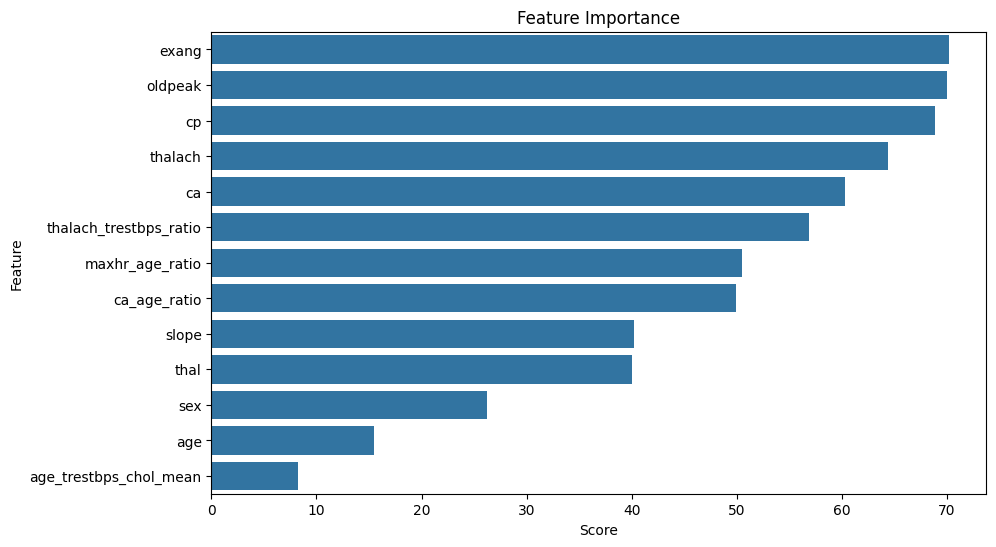

In [51]:
scores = selector.scores_[cols]
features = features_df_new.columns

df_scores = pd.DataFrame({'Feature': features, 'Score': scores})

df_scores = df_scores.sort_values('Score', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Score', y='Feature', data=df_scores)
plt.title('Feature Importance')
plt.show()

In [52]:
X_new_df.head()

,age,sex,cp,thalach,exang,oldpeak,slope,ca,thal,maxhr_age_ratio,thalach_trestbps_ratio,ca_age_ratio,age_trestbps_chol_mean
0,-0.267966,0.682656,-0.935208,0.808993,-0.698344,-0.025091,0.979514,1.274980,1.119967,0.442605,0.796007,1.418208,-0.758525
1,-0.157260,0.682656,-0.935208,0.237018,1.431958,1.869266,-2.271182,-0.714911,1.119967,0.071756,-0.222602,-0.689668,-0.632272
2,1.724733,0.682656,-0.935208,-1.082925,1.431958,1.418229,-2.271182,-0.714911,1.119967,-1.307316,-1.276548,-0.689668,-0.758525
3,0.728383,0.682656,-0.935208,0.501006,-0.698344,-0.927166,0.979514,0.280034,1.119967,-0.273594,-0.305624,0.208771,-0.343694
4,0.839089,-1.464866,-0.935208,-1.918889,-0.698344,0.786777,-0.645834,2.269926,-0.513994,-1.399394,-1.680595,1.962176,1.135267


### Spliting Data

In [53]:
X_train, X_test, y_train, y_test = holdout(X_new_df, y, random_state=42, test_size=0.2)

##Training Model Awal

In [54]:
models = {
  "Decision Tree": DecisionTreeClassifier(),
  "Naive Bayes": GaussianNB(),
  "K-Nearest Neighbors": KNeighborsClassifier(),
  "Logistic Regression": LogisticRegression(),
  "Support Vector Machine": SVC(),
  "Random Forest": RandomForestClassifier(),
  "Gradient Boosting": GradientBoostingClassifier(),
  "AdaBoost": AdaBoostClassifier(),
  "XGBoost": XGBClassifier(),
}

In [55]:
def train_all_models(model,X_train, y_train):
  trained_models = {}
  for model_name, model in models.items():
    model.fit(X_train, y_train)
    trained_models[model_name] = model
  return trained_models

result = train_all_models(models, X_train, y_train)
print(result)

{'Decision Tree': DecisionTreeClassifier(), 'Naive Bayes': GaussianNB(), 'K-Nearest Neighbors': KNeighborsClassifier(), 'Logistic Regression': LogisticRegression(), 'Support Vector Machine': SVC(), 'Random Forest': RandomForestClassifier(), 'Gradient Boosting': GradientBoostingClassifier(), 'AdaBoost': AdaBoostClassifier(), 'XGBoost': XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None,

In [56]:
def print_classification_report(models, X_test, y_test):
  model_names = list(models.keys())
  headers = ["Model Name", "Classification Report"] * 3
  rows = []

  for i in range(0, len(model_names), 3):
    row = []
    for j in range(i, min(i+3, len(model_names))):
      model_name = model_names[j]
      model = models[model_name]
      y_pred = model.predict(X_test)
      report = classification_report(y_test, y_pred, output_dict=False)
      row.extend([model_name, report])
    rows.append(row)

  print(tabulate(rows, headers=headers, tablefmt='grid'))

print_classification_report(models, X_test, y_test)

+---------------------+-------------------------------------------------------+------------------------+-------------------------------------------------------+---------------------+-------------------------------------------------------+
| Model Name          | Classification Report                                 | Model Name             | Classification Report                                 | Model Name          | Classification Report                                 |
+=====================+=======================================================+========================+=======================================================+=====================+=======================================================+
| Decision Tree       | precision    recall  f1-score   support               | Naive Bayes            | precision    recall  f1-score   support               | K-Nearest Neighbors | precision    recall  f1-score   support               |
|                     |                     

In [57]:
def generate_performance_table(models, X_test, y_test):
  rows = []
  for i, (model_name, model) in enumerate(models.items(), start=1):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    rows.append([i, model_name, accuracy, precision, recall, f1])

  headers = ["No", "Model Name", "Accuracy", "Precision", "Recall", "F1 Score"]
  return tabulate(rows, headers=headers, tablefmt='grid')

performance_table = generate_performance_table(result, X_test, y_test)
print(performance_table)

+------+------------------------+------------+-------------+----------+------------+
|   No | Model Name             |   Accuracy |   Precision |   Recall |   F1 Score |
+======+========================+============+=============+==========+============+
|    1 | Decision Tree          |   0.672131 |    0.673929 | 0.672131 |   0.672307 |
+------+------------------------+------------+-------------+----------+------------+
|    2 | Naive Bayes            |   0.819672 |    0.820307 | 0.819672 |   0.819769 |
+------+------------------------+------------+-------------+----------+------------+
|    3 | K-Nearest Neighbors    |   0.819672 |    0.829851 | 0.819672 |   0.819187 |
+------+------------------------+------------+-------------+----------+------------+
|    4 | Logistic Regression    |   0.786885 |    0.796439 | 0.786885 |   0.786312 |
+------+------------------------+------------+-------------+----------+------------+
|    5 | Support Vector Machine |   0.852459 |    0.853076 | 0.85

In [78]:
model = RandomForestClassifier()
print(model.get_params())

param = {
      'criterion': ['gini', 'entropy', 'log_loss'],
      'n_estimators': [50, 100, 200],
      'max_depth': [None, 10, 20],
      'random_state': [222]
}

clf = GridSearchCV(model, param_grid=param, cv=10, n_jobs=-1)
clf.fit(X_train, y_train)
print()
print(clf.best_params_)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

{'criterion': 'gini', 'max_depth': None, 'n_estimators': 100, 'random_state': 222}
              precision    recall  f1-score   support

           0       0.93      0.81      0.87        32
           1       0.82      0.93      0.87        29

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61



## **Hyperparameter tunning**

In [59]:
param_grid = {
  "Decision Tree": {
      'criterion': ['gini', 'entropy', 'log_loss'],
      'max_depth': [None, 50, 100],
      'max_features': [None, 'log2', 'sqrt'],
      'random_state': [103]
      },

  "Naive Bayes": {
        'var_smoothing': [1e-9, 1e-8, 1e-7]
    },

  "K-Nearest Neighbors": {
      'n_neighbors': [5, 10],
      'leaf_size': [10, 30, 50]
      },

  "Logistic Regression": {
      'C' : [0.1, 10],
      'max_iter': [100, 200, 500],
      },

  "Support Vector Machine": {
      'C' : [1, 2, 3],
      'kernel': ['linear', 'poly', 'rbf'],
      'degree': [2, 3, 4, 5],
      'gamma' : ['auto', 'scale'],
      },

  "Random Forest": {
      'criterion': ['gini', 'entropy', 'log_loss'],
      'n_estimators': [50, 100, 200],
      'max_depth': [None, 10, 20],
      'random_state': [222]
      },

  "Gradient Boosting": {
      'criterion' : ['friedman_mse', 'squared_error'],
      'n_estimators': [50, 100],
      'learning_rate': [0.1, 1],
      'random_state' : [None, 42]
      },

  "AdaBoost": {
      'n_estimators': [50, 100],
      'learning_rate': [0.1, 1],
      'random_state': [None, 42],
      },

  "XGBoost": {
      'learning_rate': [None, 1, 5],
      'max_depth': [None, 1, 5, 10],
      'n_estimators' : [None, 100, 200],
      },
}

In [81]:
class ModelTrainer:
  def __init__(self, models, param_grid):
    self.models = models
    self.param_grid = param_grid
    self.trained_models = None

  def train_hptuning(self, X_train, y_train):
    trained_models = {}
    for model_name, model in self.models.items():
      param = self.param_grid.get(model_name, {})
      grid_search = GridSearchCV(model, param, cv=10, n_jobs=-1)
      grid_search.fit(X_train, y_train)
      trained_models[model_name] = grid_search
    self.trained_models = trained_models

  def print_best_parameters(self):
    rows = []
    for model_name, grid_search in self.trained_models.items():
      best_params = grid_search.best_params_
      rows.append([model_name, best_params])

    headers = ["Model Name", "Best Parameters"]
    print(tabulate(rows, headers=headers, tablefmt='grid'))

  def print_classification_report(self, X_test, y_test):
    model_names = list(self.trained_models.keys())
    rows = []

    for i in range(0, len(model_names), 3):
      row = []
      for j in range(i, min(i+3, len(model_names))):
        model_name = model_names[j]
        model = self.trained_models[model_name]
        y_pred = model.predict(X_test)
        report = classification_report(y_test, y_pred)
        row.extend([model_name, report])
      rows.append(row)

    headers = ["Model Name", "Classification Report"] * 3
    print(tabulate(rows, headers=headers, tablefmt='grid'))

  def generate_performance_table(self, X_test, y_test):
    rows = []
    for i, (model_name, grid_search) in enumerate(self.trained_models.items(), start=1):
      model = grid_search.best_estimator_
      y_pred = model.predict(X_test)
      accuracy = accuracy_score(y_test, y_pred)
      precision = precision_score(y_test, y_pred, average='weighted')
      recall = recall_score(y_test, y_pred, average='weighted')
      f1 = f1_score(y_test, y_pred, average='weighted')
      rows.append([i, model_name, accuracy, precision, recall, f1])

    headers = ["No", "Model Name", "Accuracy", "Precision", "Recall", "F1 Score"]
    print(tabulate(rows, headers=headers, tablefmt='grid'))

  def plot_confusion_matrix(self, X_test, y_test):
    num_models = len(self.trained_models)
    num_rows = (num_models + 2) // 3
    fig, axs = plt.subplots(num_rows, 3, figsize=(10, 10))
    axs = axs.flatten()

    for i, (model_name, grid_search) in enumerate(self.trained_models.items()):
      model = grid_search.best_estimator_
      ax = axs[i]
      self._plot_confusion_matrix(model, X_test, y_test, ax)
      ax.set_title(model_name)

    for i in range(num_models, num_rows * 3):
      fig.delaxes(axs[i])

    plt.tight_layout()
    plt.show()

  def bootstrap(self, X_train, y_train, n_iterations=100, sample_size=None):
    bootstrap_results = {}
    for model_name, grid_search in self.trained_models.items():
      model = grid_search.best_estimator_
      if sample_size is None:
        sample_size = len(X_train)

      scores = []
      for _ in range(n_iterations):
        indices = np.random.choice(len(X_train), sample_size, replace=True)
        X_sampled = X_train.iloc[indices]
        y_sampled = y_train.iloc[indices]
        model.fit(X_sampled, y_sampled)
        score = model.score(X_sampled, y_sampled)
        scores.append(score)

      bootstrap_results[model_name] = scores

    return bootstrap_results

  def print_bootstrap_results(self, X_train, y_train, n_iterations=100, sample_size=None):
    bootstrap_results = self.bootstrap(X_train, y_train, n_iterations, sample_size)
    headers = ["Model Name", "Mean Score", "Standard Deviation", "95% Confidence Interval"]
    rows = []

    for model_name, scores in bootstrap_results.items():
        mean_score = np.mean(scores)
        std_score = np.std(scores)
        ci_lower = np.percentile(scores, 2.5)
        ci_upper = np.percentile(scores, 97.5)
        rows.append([model_name, mean_score, std_score, (ci_lower, ci_upper)])

    print(tabulate(rows, headers=headers, tablefmt='grid'))

  def plot_bootstrap_results(self, X_train, y_train, n_iterations=100, sample_size=None):
    bootstrap_results = self.bootstrap(X_train, y_train, n_iterations, sample_size)
    model_names = list(bootstrap_results.keys())
    score_list = list(bootstrap_results.values())

    plt.figure(figsize=(10, 6))
    plt.boxplot(score_list, labels=model_names, showmeans=True)
    plt.title("Bootstrap Results")
    plt.xlabel("Model")
    plt.ylabel("Score")
    plt.xticks(rotation=90)
    plt.show()

  def _plot_confusion_matrix(self, model, X_test, y_test, ax):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    classes = sorted(set(y_test))

    ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.set_title('Confusion Matrix')
    tick_marks = range(len(classes))
    ax.set_xticks(tick_marks)
    ax.set_xticklabels(classes)
    ax.set_yticks(tick_marks)
    ax.set_yticklabels(classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      ax.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')

  def print_cross_validation(self):
    rows = []
    for model_name, grid_search in self.trained_models.items():
      cv_scores = grid_search.cv_results_['mean_test_score']
      cv_std = grid_search.cv_results_['std_test_score']
      mean_cv_score = np.mean(cv_scores)
      std_cv_score = np.mean(cv_std)
      rows.append([model_name, mean_cv_score, std_cv_score])

    headers = ["Model Name", "Cross Validation Mean Score", "Cross Validation Standard Deviation"]
    print(tabulate(rows, headers=headers, tablefmt='grid'))

  def plot_learning_curve(self, X, y):
    num_models = len(self.trained_models)
    fig, axs = plt.subplots(3, 3, figsize=(10, 10))
    axs = axs.flatten()

    for i, (model_name, grid_search) in enumerate(self.trained_models.items()):
      model = grid_search.best_estimator_
      ax = axs[i]
      self._plot_learning_curve(model, X, y, ax)
      ax.set_title(model_name)

    for i in range(num_models, 3 * 3):
      fig.delaxes(axs[i])

    plt.tight_layout()
    plt.show()

  def _plot_learning_curve(self, model, X, y, ax):
    train_sizes, train_scores, test_scores = learning_curve(
      model, X, y, cv=10, n_jobs=-1)

    ax.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='Training Score')
    ax.fill_between(train_sizes, np.mean(train_scores, axis=1) - np.std(train_scores, axis=1), np.mean(train_scores, axis=1) + np.std(train_scores, axis=1), alpha=0.1)
    ax.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label='Cross-Validation Score')
    ax.fill_between(train_sizes, np.mean(test_scores, axis=1) - np.std(test_scores, axis=1), np.mean(test_scores, axis=1) + np.std(test_scores, axis=1), alpha=0.1)
    ax.legend()
    ax.set_xlabel('Training Examples')
    ax.set_ylabel('Score')
    ax.set_ylim(0,1.1)
    ax.set_title('Learning Curve')

  def predict_using_model(self, model_name, X):
    if model_name in self.trained_models:
      model = self.trained_models[model_name].best_estimator_
      return model.predict(X)
    else:
      print("Model '{}' tidak ditemukan.".format(model_name))
      return None

### Train Model dengan Hyperparameter Tuning

In [82]:
trainer = ModelTrainer(models, param_grid)
trainer.train_hptuning(X_train, y_train)

### Best Parameters

In [83]:
trainer.print_best_parameters()

+------------------------+-----------------------------------------------------------------------------------------------+
| Model Name             | Best Parameters                                                                               |
+========================+===============================================================================================+
| Decision Tree          | {'criterion': 'gini', 'max_depth': None, 'max_features': 'log2', 'random_state': 103}         |
+------------------------+-----------------------------------------------------------------------------------------------+
| Naive Bayes            | {'var_smoothing': 1e-09}                                                                      |
+------------------------+-----------------------------------------------------------------------------------------------+
| K-Nearest Neighbors    | {'leaf_size': 10, 'n_neighbors': 10}                                                          |
+---------------

In [84]:
trainer.generate_performance_table(X_test, y_test)

+------+------------------------+------------+-------------+----------+------------+
|   No | Model Name             |   Accuracy |   Precision |   Recall |   F1 Score |
+======+========================+============+=============+==========+============+
|    1 | Decision Tree          |   0.737705 |    0.737705 | 0.737705 |   0.737705 |
+------+------------------------+------------+-------------+----------+------------+
|    2 | Naive Bayes            |   0.819672 |    0.820307 | 0.819672 |   0.819769 |
+------+------------------------+------------+-------------+----------+------------+
|    3 | K-Nearest Neighbors    |   0.819672 |    0.829851 | 0.819672 |   0.819187 |
+------+------------------------+------------+-------------+----------+------------+
|    4 | Logistic Regression    |   0.836066 |    0.850982 | 0.836066 |   0.835271 |
+------+------------------------+------------+-------------+----------+------------+
|    5 | Support Vector Machine |   0.852459 |    0.852601 | 0.85

## Bootstraping

In [89]:
trainer.print_bootstrap_results(X_train, y_train)

+------------------------+--------------+----------------------+------------------------------------------+
| Model Name             |   Mean Score |   Standard Deviation | 95% Confidence Interval                  |
+========================+==============+======================+==========================================+
| Decision Tree          |     1        |           0          | (1.0, 1.0)                               |
+------------------------+--------------+----------------------+------------------------------------------+
| Naive Bayes            |     0.842531 |           0.0254798  | (0.7925311203319502, 0.8879668049792531) |
+------------------------+--------------+----------------------+------------------------------------------+
| K-Nearest Neighbors    |     0.872697 |           0.0223056  | (0.8235477178423236, 0.9128630705394191) |
+------------------------+--------------+----------------------+------------------------------------------+
| Logistic Regression    |  

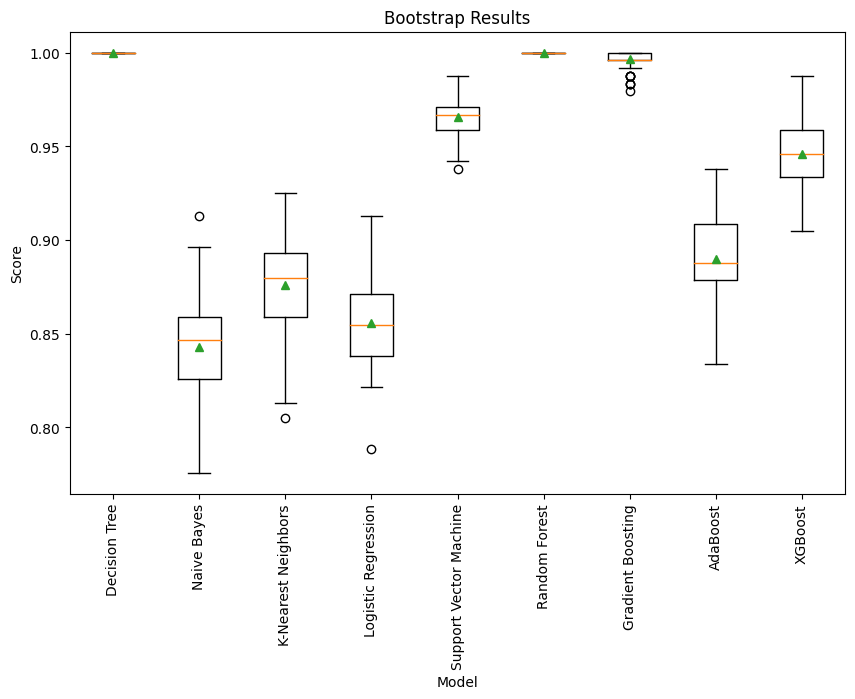

In [90]:
trainer.plot_bootstrap_results(X_train, y_train)

## Cross Validation

In [85]:
trainer.print_cross_validation()

+------------------------+-------------------------------+---------------------------------------+
| Model Name             |   Cross Validation Mean Score |   Cross Validation Standard Deviation |
+========================+===============================+=======================================+
| Decision Tree          |                      0.747593 |                             0.0784118 |
+------------------------+-------------------------------+---------------------------------------+
| Naive Bayes            |                      0.817167 |                             0.0798751 |
+------------------------+-------------------------------+---------------------------------------+
| K-Nearest Neighbors    |                      0.819333 |                             0.0697133 |
+------------------------+-------------------------------+---------------------------------------+
| Logistic Regression    |                      0.825417 |                             0.0581209 |
+---------

## Learning Curve

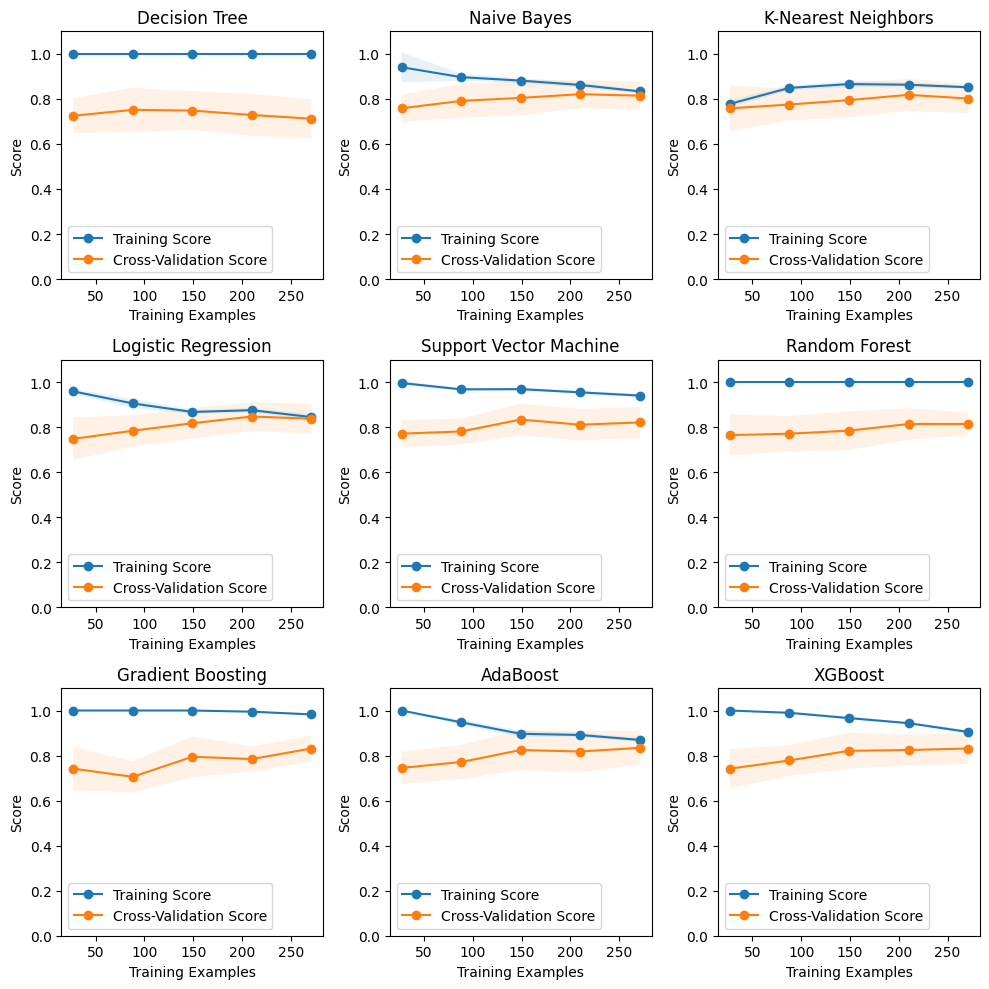

In [86]:
trainer.plot_learning_curve(X_scaled, y)

## Classification Report

In [87]:
trainer.print_classification_report(X_test, y_test)

+---------------------+-------------------------------------------------------+------------------------+-------------------------------------------------------+---------------------+-------------------------------------------------------+
| Model Name          | Classification Report                                 | Model Name             | Classification Report                                 | Model Name          | Classification Report                                 |
+=====================+=======================================================+========================+=======================================================+=====================+=======================================================+
| Decision Tree       | precision    recall  f1-score   support               | Naive Bayes            | precision    recall  f1-score   support               | K-Nearest Neighbors | precision    recall  f1-score   support               |
|                     |                     

## Confusion Matrix

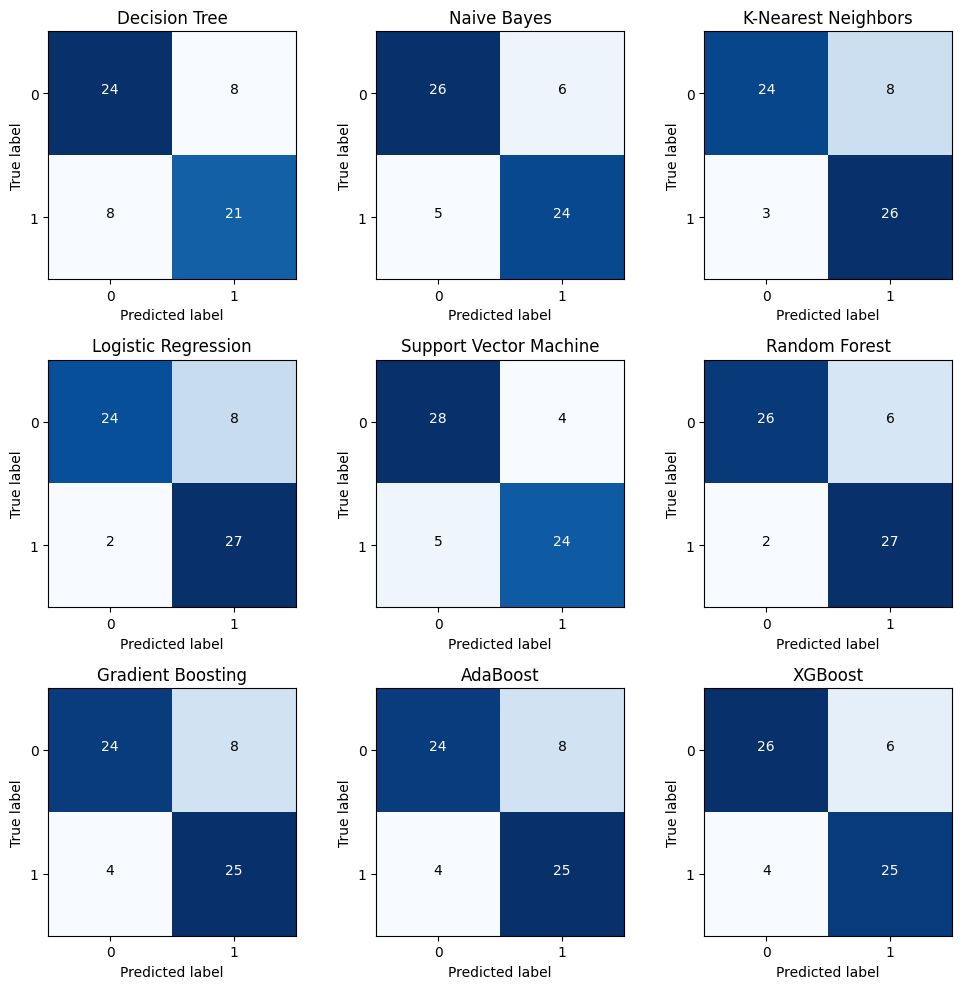

In [88]:
trainer.plot_confusion_matrix(X_test, y_test)